## 2. Thực hành

In [158]:
#tham khảo: https://dev.to/nitdgplug/stonksmaster-predict-stock-prices-using-python-ml-3hmc

### 2.1 Chuẩn bị thư viện và dữ liệu

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

**Import dữ liệu và loại bỏ những trường không cần thiết**

In [200]:
df = pd.read_csv('BTC_CSV5.csv')
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,Closing_Price
0,2020-05-21,0.954089
1,2020-05-22,0.914115
2,2020-05-23,0.919285
3,2020-05-24,0.922008
4,2020-05-25,0.904872
...,...,...
362,2021-05-18,4.314447
363,2021-05-19,4.319605
364,2021-05-20,3.943924
365,2021-05-21,3.975609


**Vẽ đồ thị minh họa**

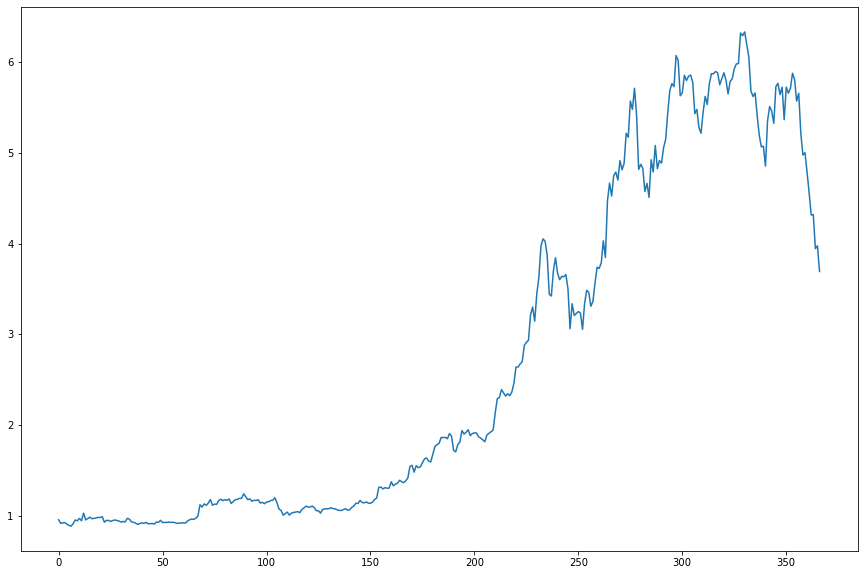

In [201]:
df['Closing_Price'].plot(kind='line',figsize=(15, 10))

plt.show()

=> Nhìn vào đồ thị ta thấy giá BTC từ tháng 1 đến tháng 11 năm 2020 tăng giảm những không đồng đều

=> Từ tháng 12 năm 2020 đến tháng 4 năm 2021 giá BTC tăng mạnh, đến cuối tháng 5 thì giá BTC giảm sâu.

=> Đều này cho biết 1 điều đồ thị là một chuỗi không dừng 

### 2.2 Chia Train/Test

In [202]:
df["timestamp"] = pd.to_datetime(df.Date).astype(np.int64)
df

,Date,Closing_Price,timestamp
0,2020-05-21,0.954089,1590019200000000000
1,2020-05-22,0.914115,1590105600000000000
2,2020-05-23,0.919285,1590192000000000000
3,2020-05-24,0.922008,1590278400000000000
4,2020-05-25,0.904872,1590364800000000000
...,...,...,...
362,2021-05-18,4.314447,1621296000000000000
363,2021-05-19,4.319605,1621382400000000000
364,2021-05-20,3.943924,1621468800000000000
365,2021-05-21,3.975609,1621555200000000000


In [203]:
df.pop('Date')
df

,Closing_Price,timestamp
0,0.954089,1590019200000000000
1,0.914115,1590105600000000000
2,0.919285,1590192000000000000
3,0.922008,1590278400000000000
4,0.904872,1590364800000000000
...,...,...
362,4.314447,1621296000000000000
363,4.319605,1621382400000000000
364,3.943924,1621468800000000000
365,3.975609,1621555200000000000


In [204]:
df = df.values
X = df[:,1].reshape(-1,1)
Y = df[:,0:1]


***Chia dữ liệu 15% test, 85% train và random_state = 7***

In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

### 2.3 Chạy Model

In [177]:
#RBF
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train,Y_train)

c:\users\minh nhut\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [188]:
predict = rbf_svr.predict(X)

In [189]:
predict

array([1.00845605, 1.00452718, 1.00079712, 0.99726461, 0.99392822,
       0.9907864 , 0.98783743, 0.98507944, 0.98251045, 0.9801283 ,
       0.97793072, 0.97591528, 0.97407945, 0.97242054, 0.97093576,
       0.96962218, 0.96847677, 0.96749636, 0.9666777 , 0.96601741,
       0.96551203, 0.96515798, 0.96495161, 0.96488917, 0.96496682,
       0.96518067, 0.96552673, 0.96600096, 0.96659925, 0.96731742,
       0.96815127, 0.96909654, 0.97014891, 0.97130406, 0.97255762,
       0.9739052 , 0.9753424 , 0.97686479, 0.97846797, 0.98014749,
       0.98189896, 0.98371796, 0.98560011, 0.98754104, 0.98953642,
       0.99158195, 0.99367337, 0.99580647, 0.99797707, 1.00018109,
       1.00241447, 1.00467324, 1.00695349, 1.00925141, 1.01156324,
       1.01388534, 1.01621414, 1.01854618, 1.02087809, 1.02320662,
       1.02552863, 1.02784107, 1.03014104, 1.03242575, 1.03469253,
       1.03693884, 1.03916229, 1.04136061, 1.04353168, 1.0456735 ,
       1.04778424, 1.04986221, 1.05190586, 1.05391381, 1.05588

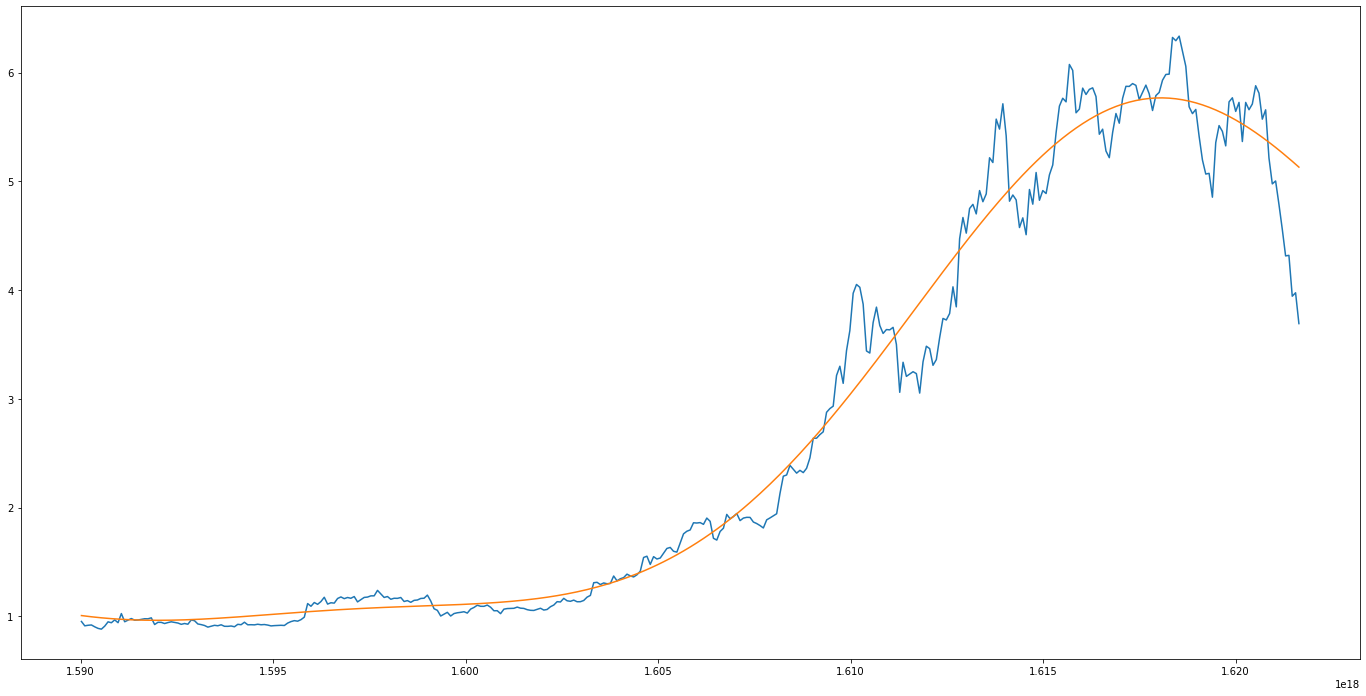

In [190]:
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predict)
plt.show()

In [193]:
from sklearn.metrics import mean_squared_error

In [195]:
print(mean_squared_error(Y, predict))

0.08205394429210282


In [196]:
#poly

#RBF
poly_svr = SVR(kernel='poly')
poly_svr.fit(X_train,Y_train)

c:\users\minh nhut\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [197]:
predict = poly_svr.predict(X)

In [198]:
predict

array([2600283.76120439, 2592177.02292314, 2584068.96432939,
       2575960.38620439, 2567850.53073564, 2559740.05417314,
       2551628.71823564, 2543516.59714189, 2535403.51901689,
       2527289.26120439, 2519174.52292314, 2511058.72995439,
       2502941.78073564, 2494824.42136064, 2486705.83542314,
       2478586.90964189, 2470466.56589189, 2462345.52292314,
       2454223.61667314, 2446100.72604814, 2437977.25339189,
       2429852.43698564, 2421727.15964189, 2413600.42917314,
       2405473.31198564, 2397345.19479814, 2389216.23776689,
       2381086.37839189, 2372955.43698564, 2364823.83932939,
       2356691.40573564, 2348557.90964189, 2340423.76120439,
       2332288.34323564, 2324152.41354814, 2316015.67526689,
       2307877.65182939, 2299738.94089189, 2291599.37057939,
       2283459.02292314, 2275317.29636064, 2267175.24557939,
       2259032.39792314, 2250887.96823564, 2242743.58932939,
       2234597.44479814, 2226450.80026689, 2218303.04245439,
       2210154.65573564,